# Los Angeles County Health Inpections


In [1]:
# Import all libraries needed for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline 

## Dataset Description


The dataset I chose comes from the Los Angeles County Environmental Health Department. They are responsible for inspecting restaurants in Los Angeles County, California, with the exception of the cities of Pasadena, Long Beach, and Vernon, which have their own enforcement teams. I chose to include two files that were available on Kaggle.

The `inspections.csv` file gives information on each inspection that was done, and the `violations.csv` lists specific violations on each inspections. Let's take a look at what these files contain.

In [2]:
inspect_df = pd.read_csv('inspections.csv')
violations_df = pd.read_csv('violations.csv')

### Inpections file
The `inpspections.csv` file has twenty columns. Many relate to identifying the restaurant, such as the name and address columns, others to the inspection, such as the serial number and score. There are 191371 rows. "Score" is one of the main things will be looking at. Scores have a maximum of 100, and are given grades based on those scores. (A is 90-100, B is 80-89, C is 70-79) With a mean of 93.75 and a standard deviation of 3.84, it is pretty clear that scores tend toward the high side. 

A count of the grades backs this up, with a vast majority of inspections resulting in an 'A.' Great news! If you go to a restaurant in LA County, it probably got an 'A' on it's inspection. Now this isn't too shocking. Since this list includes multiple inspections for many restaurants, the good ones will stay around longer, and will inflate the higher score number. Also, since low scores can destroy a restaurant's reputaion, one would expect that restaurants owners would work for high scores. Restaurants with a score lowever than 70 received no grade. Thankfully, this happened only 32 times in over 191,000 inspections

Here are the columns in the Inspections file. The main columns we'll be looking at are score and grade. The serial number will be used to merge this inspections with their associated violations.

In [3]:
inspect_df.columns

Index(['activity_date', 'employee_id', 'facility_address', 'facility_city',
       'facility_id', 'facility_name', 'facility_state', 'facility_zip',
       'grade', 'owner_id', 'owner_name', 'pe_description',
       'program_element_pe', 'program_name', 'program_status', 'record_id',
       'score', 'serial_number', 'service_code', 'service_description'],
      dtype='object')

The scores of the inspections are descirbed below.

In [4]:
inspect_df.score.describe()

count    191371.000000
mean         93.753306
std           3.845518
min          54.000000
25%          91.000000
50%          94.000000
75%          97.000000
max         100.000000
Name: score, dtype: float64

Here we see the grades of all the inspections in the data set.

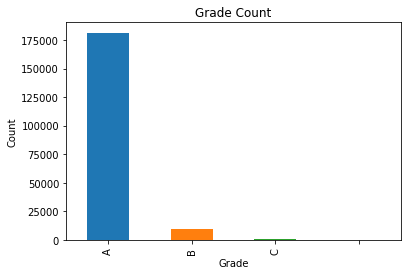

A    181278
B      9379
C       682
         32
Name: grade, dtype: int64


In [5]:
# inspect_df['grade'].value_counts().plot(kind = 'bar')
inspect_df['grade'].value_counts().plot(kind = 'bar')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Count')
plt.show()

print(inspect_df['grade'].value_counts())

There were some inspections that did not receive a grade because they received a grade lower than 70 points. 

In [6]:
inspect_df[inspect_df['grade'] == ' '].score.count()

32

### Violations file

This file is a little simpler, as is just a list of accured violations. We will use it to see what the inspections actually turned up. The one quantitative column is "points." This is how much the restaurant was penalized for each violation. With a mean of 1.33 and a standard deviaion of 0.8, it looks like most violations are relatively minor. The max violation is 11 points. We'll take a look at this later in the report.

In [7]:
violations_df.describe()

,points
count,906014.000000
mean,1.331127
std,0.807775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


## Analytic Questions



### Clustering of Scores

The relatively high scores listed in the seemed to invite a closer look. I wanted to see if there were any noticable tendencies in how inspections were scored. I tried several bin sizes until it became cleare that 30 best represented the data.

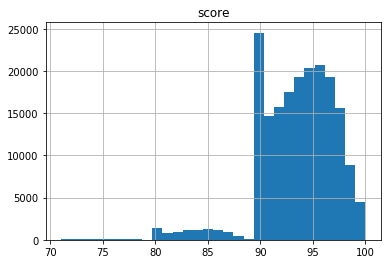

In [8]:
# Creating historgram to see how common different scores are.

inspect_df[inspect_df['score'] > 70].hist('score', bins=30)
plt.show()

The first thing that is noticeable is that the vast majority of scores are over 90, but we knew that from the basic summary data. However, we didn't know that there was a big group of inspections with a score of exactly "90," which we can verify by checking for the mode directly. This raises several questions. How does this happen? I verified that there were no violations on file that are valued at exactly 10 points, so this is not caused by a single common violation. The relatively normal appearance of the data from scores 91 to 100 make is seem unlikely that this is simply chance. What could account for this (and for the similar, much smaller bump at 80)? 

I don't have access to this information, but I would suspect that there are repurcushions for a restaurant when a score drops out of the "A" grade range (>= 90). Perhaps they get a notice posted in their window, or they get flagged in online systems. Perhaps rating sites like Yelp remove them from the listing if they are flagged. There may be financial penalties. On the inspector side, a "B" or below may necessitate a second visit be added to their already full schedule. This is all conjecture though. The true explanation would require more information.


### Comparing High Scorers and Low Scorers

I was interested in seeing whether restuarants that earned grades of A's on there inspections differed in any identifiable way from those that did poorly. That is, if I saw an "A" restaurant, could I assume that they got one type of violation, while "C" restaurants tended to get others. To figure this out, I needed to merge the two files to tie the individual violations to the inspections. The inspection serial number provides a key to allow this. Then we can chart the most common violations that they see. For readability, I've just put the violation code on the chart. The codes are listed below.

In the most commen violations, it seems that they A's and C's are similar. Problems with floors, walls, and ceilings as well as nonfood contact surfaces are the most common (Violation codes F044, F033, F035). However, then things get interesting. Where the A's have to fine-tune their plumbing (F040), a whole other type of problem pops up in the C's. Their fourth most common violation is F023, which deal with rodents, insects, and animals. Their top five is rounded out with F014: they aren't properly cleaning and sanitizing their food contact surfaces. 

It is clear that the A's and C's have real differences. In the next section we'll take a closer look at the lower-scoring restaurants.

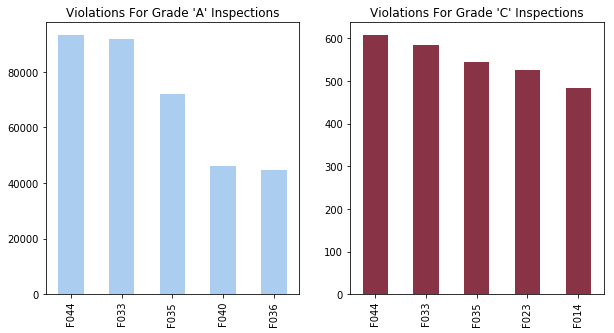

,violation_description
violation_code,
F044,"# 44. Floors, walls and ceilings: properly bui..."
F033,# 33. Nonfood-contact surfaces clean and in go...
F035,# 35. Equipment/Utensils - approved; installed...
F040,"# 40. Plumbing: Plumbing in good repair, prope..."
F036,"# 36. Equipment, utensils and linens: storage ..."
F023,"# 23. No rodents, insects, birds, or animals"
F014,# 14. Food contact surfaces: clean and sanitized


In [9]:
# RECOMMEND THAT READER COLLAPSE THIS CELL FOR EASE OF READING

# merge files on serial number
insp_with_vio = inspect_df.merge(violations_df, how = 'left', on = 'serial_number')
grade_violations_df = insp_with_vio

category = 'violation_code'

plt.figure(figsize=(10, 5))
 
# Create chart of top 5 violations of the A-graded restaurants
plt.subplot(121)
noted_violations_A = grade_violations_df[grade_violations_df['grade'] == 'A'][category].value_counts() 
#violation_description gives full name
top_violations_A = noted_violations_A[0:5]
# I set a single color here because the default color mix varied between the two charts, 
# resulting in confusion when trying to compare them
top_violations_A.plot(kind = 'bar', color = '#abcdef')
plt.title('Violations For Grade \'A\' Inspections')


# Create chart of top 5 violations of the C-graded restaurants
plt.subplot(122)
noted_violations_C = grade_violations_df[(grade_violations_df['grade'] == 'C')][category].value_counts() 
#violation_description gives full name
top_violations_C = noted_violations_C[0:5]
# I set a single color here because the default color mix varied between the two charts, 
# resulting in confusion when trying to compare them
top_violations_C.plot(kind = 'bar', color = '#893346')
plt.title('Violations For Grade \'C\' Inspections')
plt.show()

# create df with the violation codes
noted_violations = grade_violations_df[(grade_violations_df['grade'] == 'C') | (grade_violations_df['grade'] == 'A')]['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:13]
# print(top_violations.index)
top_df = pd.DataFrame(top_violations)
common_violations_df = top_df.merge(violations_df, how = 'left', left_index=True, right_on='violation_code'  )

# this has multiple entries for each code. Creating new df to clean this up
vio_df_single = common_violations_df

# Trying to remove duplicate rows based on duplicated violation codes
vio_df_single.drop_duplicates(subset='violation_code', keep='first', inplace=True)
vio_df_single.head()
vio_df_single.columns

# Getting rid of unneeded columns
del vio_df_single['violation_code_x']
del vio_df_single['points']
del vio_df_single['serial_number']
del vio_df_single['violation_code_y']
del vio_df_single['violation_status']

vio_df_single.set_index('violation_code', inplace=True)

# Table pulls the number of codes needed to encompass all the codes on both charts,
# then I limit it to only list those I needed for the chart. 

vio_df_single.loc[['F044', 'F033', 'F035', 'F040', 'F036', 'F023', 'F014']]


_______

### What do restaurants do to earn low scores ?

Having identified that lower graded restaurants are more likely to get lower scores, I wanted to look at some more specifics. I focused on the restaurants with a grade of C. Let's look at them. Is it possible that a restaurant can get flagged with a C from just one violation? Maybe this could be explained away by the restaurant just having a bad day or an inspector overstating a violation

There are 682 of them, with a mean score of 74.7. Since we saw earlier that the highest point violation was 11 points, obviously C inspections are not simply coming from one bad score. One score could knock them down to a B, but not a C.

In [11]:
inspect_df[inspect_df['grade'] == 'C'].describe()

,program_element_pe,score,service_code
count,682.000000,682.000000,682.000000
mean,1632.583578,74.674487,4.519062
std,7.262413,2.567084,37.380338
min,1610.000000,70.000000,1.000000
25%,1632.000000,73.000000,1.000000
50%,1635.000000,75.000000,1.000000
75%,1638.000000,77.000000,1.000000
max,1641.000000,79.000000,401.000000


What are the 11 point violations? As we see below, The vast majority are cases of the inspector finding rodents, insects, or animals (violation code F023). However, looking at even a few cases of F023 violations in C inspections, we can see that not every F023 is an 11-point violation. The inspection allows for a smaller penalty, even as low as two points. A big violation indicates an egregious violation.

In [26]:
# all the violation that were given 11 points.

violations_df[violations_df['points'] == 11].groupby('violation_description').describe()

points                         \
                                                count  mean  std   min   25%   
violation_description                                                          
# 21b. Water available                           17.0  11.0  0.0  11.0  11.0   
# 22. Sewage and wastewater properly disposed    84.0  11.0  0.0  11.0  11.0   
# 23. No rodents, insects, birds, or animals   1008.0  11.0  0.0  11.0  11.0   

                                                                 
                                                50%   75%   max  
violation_description                                            
# 21b. Water available                         11.0  11.0  11.0  
# 22. Sewage and wastewater properly disposed  11.0  11.0  11.0  
# 23. No rodents, insects, birds, or animals   11.0  11.0  11.0

In [27]:
# Sampling of C's with F023 violations, demonstrating that they are not automatically 11 points
insp_with_vio[(insp_with_vio['grade'] == 'C') & (insp_with_vio['violation_code'] == 'F023')]['points'].head(15)

335       4.0
2006     11.0
3435      2.0
4310      2.0
6814      2.0
7223     11.0
10382    11.0
11231     2.0
11279    11.0
12174    11.0
17295    11.0
21315    11.0
23458     2.0
23488     4.0
24373     4.0
Name: points, dtype: float64

#### These inspections are not a fluke.

As we can see, if a restaurant gets a low score, they must have a few violations, or at least two very serious ones. Also, as we saw in the first question, there is even a small clustering at 80 points, indicating that inspectors make some effort to avoid giving out a C grade or lower. One can confidently say that a C grade reflects a restaurant having multiple, serious issues.
_______

## Further Research

Analyzing this data has shown several interesting points, but it invites several more questions. 

It would be interesting to see if scores are related to location. The current data include ZIP codes, but more exact info could be found from mapping the addresses. It would be interesting to see if low/high scores were tied to specific areas of town. If so, this could invite investigation as to the cause. Are certain areas being "picked on?" Are there areas with more pests, more moisture, or other environmental issues that could explain this?  

The data doesn't currently indicate anything about building age. Does having an older facitily make a restaurant likely to get lower scores? What about the age of the the city infrustructure serving the site, such as sewers or electrical services. Should a restaurant be punished if they are in a poorly-served area? Could owners be forewarned that they need to account for these types of things before they are inspected?

Another thing that would be interesting to look at is whether certain factors can be used to predict specific violations. Some seem obvious. If you inspect a place and see food all over the floor, it is no mystery that they might have pests. What I'd like to find out is if there are some unexpected correlations. Does a plumbing problem predict a lack of cleaning supplies? Do broken windows increase the likelyhood that there are poorly maintained refrigerators? I don't know, but I can certainly can see how finding some of these correlations woud help an inspector be alerted to potential problems.

